In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.fft as fft
from numba import jit
import scipy.stats as stats

In [4]:
filename = "interface0.14.pkl"
with open(filename, 'rb') as f:
    interface_dict, x_dict, y_dict, t_dict = pickle.load(f)

In [5]:
n_times = len(list(interface_dict.keys()))
interface = np.zeros((n_times, len(interface_dict[0])))
for t, h in interface_dict.items():
    interface[t,:] = h
start_from = np.argwhere((interface==0).sum(axis=1)>0).flatten()[-1]
interface = interface[start_from+1:]

In [6]:
r_mean = np.array([ np.mean(interface_dict[key])  for key in interface_dict])
r_std = np.array([ np.std(interface_dict[key])  for key in interface_dict])

In [7]:
def compute_velocity(h):
    V = []
    min_length = h.shape[0]
    for idx in range(h.shape[1]):
        dh = np.diff(h[:,idx])
        jump_times = np.argwhere(dh>0).flatten()
        jumps = dh[jump_times]
        waiting_times = np.diff(np.insert(jump_times,0,0))
        velocities = jumps/(waiting_times+1)
        v = np.repeat(velocities,waiting_times )
        if(len(v)<min_length):
            min_length = len(v)
        V.append(v)
    vel = np.zeros((len(V), min_length))
    for idx in range(len(V)):
        vel[idx,:] = V[idx][:min_length]
    return vel

In [8]:
v_h = compute_velocity(interface)

In [21]:
c_t = fft.ifft(np.abs( fft.fft(v_h-v_h.mean(axis=1).reshape(-1,1), axis=1))**2, axis=1).real.mean(axis=0)
c_t = c_t[:len(c_t)//2]
c_th = fft.ifft(np.abs( fft.fft(v_h-v_h.mean(axis=0), axis=0))**2, axis=0).real.mean(axis=1)
c_th = c_th[:len(c_th)//2]

111.5033353895094


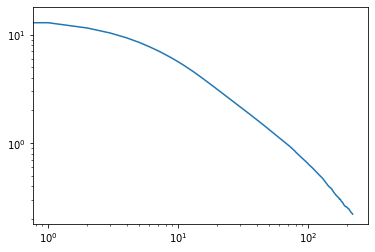

In [28]:
plt.plot(c_t[:220])
res = stats.linregress(np.arange(100,220),np.log(c_t[100:220]))
print(-1/res[0])
plt.yscale('log')
plt.xscale('log')

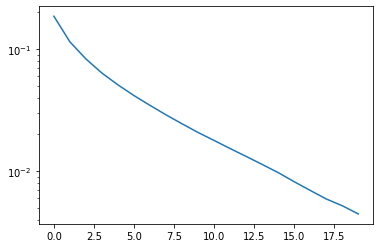

In [31]:
plt.plot(c_th[:20])
plt.yscale('log')